# Projet new car

In [2]:
import pandas
car_data = pandas.read_csv("carData.csv",sep = ',')


#dimensions : nombre de lignes, nombre de colonnes
#la ligne d'en-tête n'est pas comptabilisée
#dans le nombre de lignes
print(car_data.shape)
#énumération des colonnes
print(car_data.columns)



(301, 9)
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [4]:
#affichage de quelques données
print(car_data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


 # Définition des carateristiques:
 
    
    Car_Name : Cette colonne doit être remplie avec le nom de la voiture.
    ● Year:    Cette colonne doit être remplie avec l'année de fabrication de la voiture.
    ● Selling_Price: cette colonne doit être remplie avec le prix auquel le propriétaire
                      souhaite vendre la voiture.
    ● Kms_Driven :  Il s'agit de la distance parcourue par la voiture en km.
    ● Fuel_Type :   Type de carburant de la voiture.
    ● Seller_Type : définit si le vendeur est un revendeur ou un particulier.
    ● Transmission: définit si la boite de vitesse de la voiture est manuelle ou automatique.

In [3]:
car_data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


    #quelques statistiques de base (moyenne, médiane,quartile,Ecart-type)

In [5]:
car_data.Car_Name.describe()

count      301
unique      98
top       city
freq        26
Name: Car_Name, dtype: object

In [6]:
car_data.Kms_Driven.describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

In [7]:
car_data.Present_Price.describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

# tracer la distribution avec Matplotlib (histogramme)

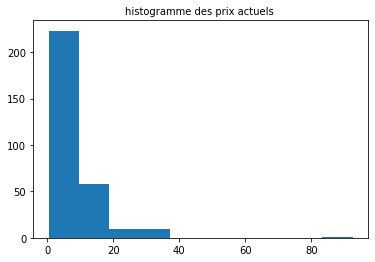

In [8]:
import matplotlib.pyplot as plt

data = car_data.Present_Price

plt.hist(data)

plt.title('histogramme des prix actuels ', fontsize=10)

#plt.savefig("plot_simple_histogramme_matplotlib_01.png")

plt.show()

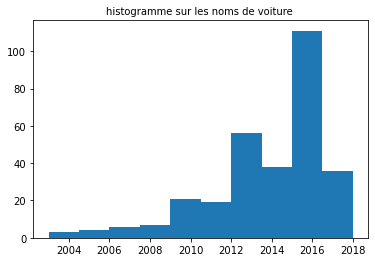

In [9]:
plt.hist(car_data.Year)

plt.title('histogramme sur les noms de voiture ', fontsize=10)

plt.show()

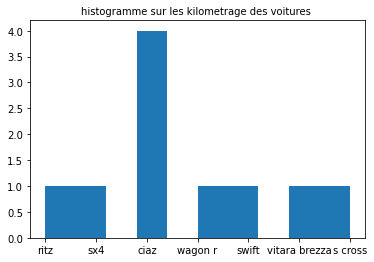

In [10]:
plt.hist(car_data.Car_Name[:10])

plt.title('histogramme sur les kilometrage des voitures ', fontsize=10)

plt.show()

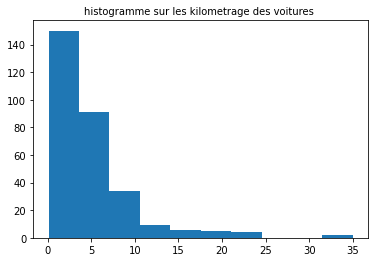

In [11]:
plt.hist(car_data.Selling_Price)

plt.title('histogramme sur les kilometrage des voitures ', fontsize=10)

plt.show()



# Visualisez les données grâce à la librairie Seaborn

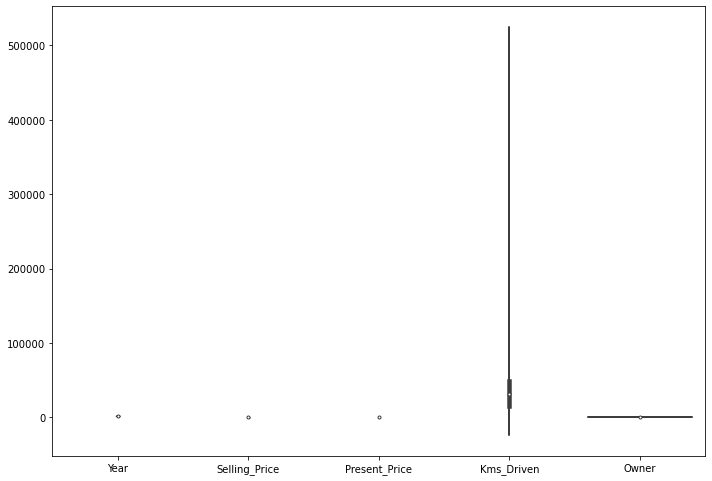

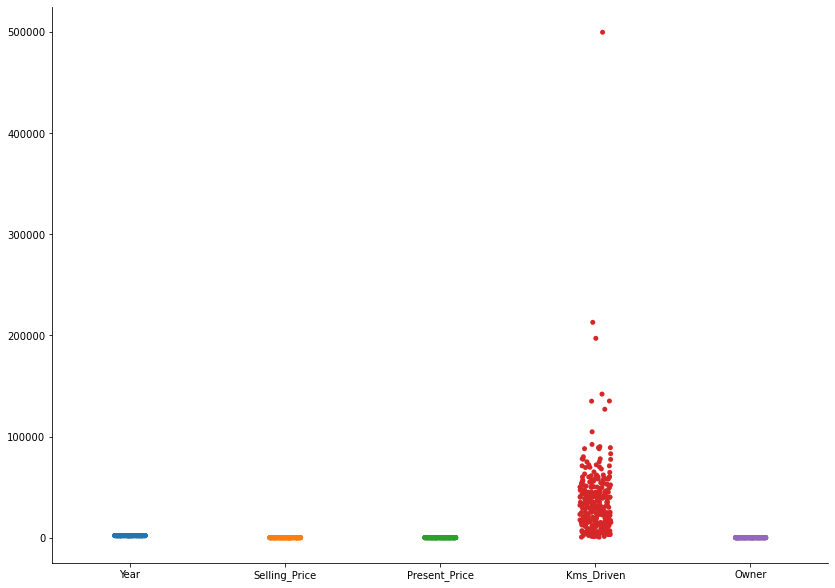

In [51]:
import seaborn



a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
seaborn.violinplot(ax=ax, data=car_data)
seaborn.catplot(data=car_data, height=8.27, aspect=11.7/8.27)
plt.show()

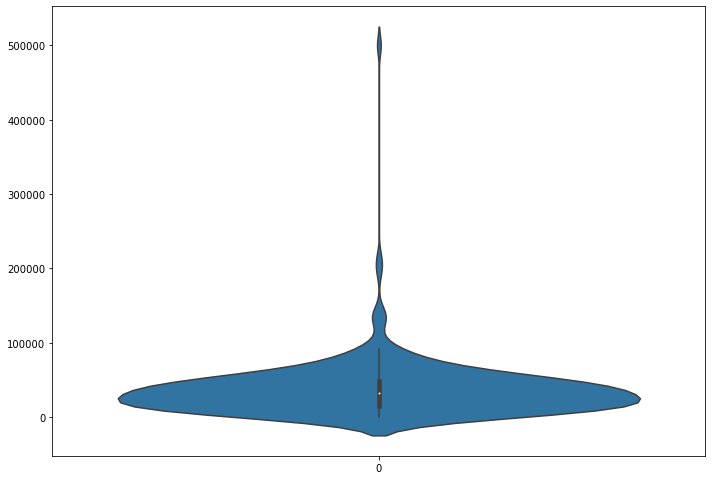

In [13]:
fig, ax = plt.subplots(figsize=a4_dims)
seaborn.violinplot(ax=ax, data=car_data.Kms_Driven)
plt.show()

# Regression lineaire
# Quantifiez la relation entre l'âge et le prix de vente

/home/houmenou/Téléchargements/cf2ff493f11eaad5d09ce2b4feaa5ea90db5174303d5b3fe030e16d29aeef7de/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


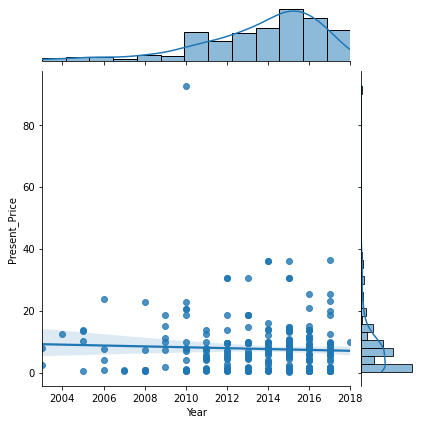

In [14]:
seaborn.jointplot(car_data.Year, car_data.Present_Price,kind='reg')
plt.show()

# outil de visualisation Matplotlib permettant d'appuyer notre argumentation

### ● Appliquer l’algorithme de régression linéaire univariée en vous aidant de la
            librairie Scipy.

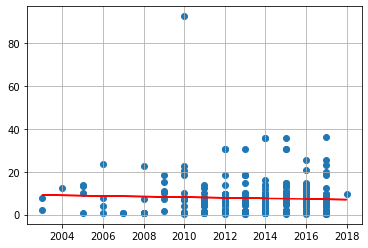

In [15]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept

axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(car_data.Year, car_data.Present_Price) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
slope, intercept, r_value, p_value, std_err = stats.linregress(car_data.Year, car_data.Present_Price)
def predict(x):
   return slope * x + intercept

#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(car_data.Year)
plt.plot(car_data.Year, fitLine, c='r')
plt.show()

R-squared: 0.002264


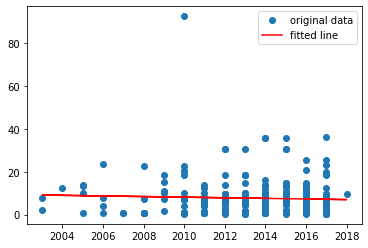

In [16]:
# Autre methode de faire
from scipy import stats

res = stats.linregress(car_data.Year, car_data.Present_Price)
print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(car_data.Year, car_data.Present_Price, 'o', label='original data')
plt.plot(car_data.Year, res.intercept + res.slope*car_data.Year, 'r', label='fitted line')
plt.legend()
plt.show()

### ● Appliquer l’algorithme de régression linéaire univariée en vous aidant de la
             librairie Numpy.

[-1.4224994e-01  2.9406692e+02]


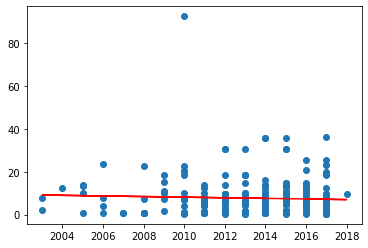

In [17]:
import numpy as np

 
fit = np.polyfit(car_data.Year, car_data.Present_Price,deg=1)
print(fit)
prediction =np.poly1d(fit) #fonction polynomiale 
plt.scatter(car_data.Year, car_data.Present_Price)
plt.plot(car_data.Year,prediction(car_data.Year),'red')


plt.show()

# ● Appliquer l’algorithme de régression linéaire univariée en vous aidant de la
        librairie sklearn

<AxesSubplot:>

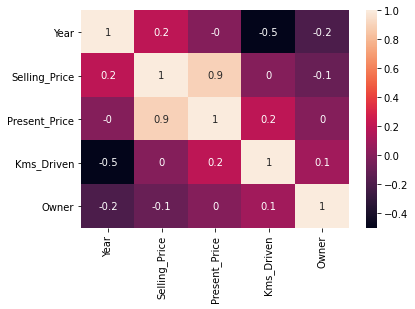

In [18]:
#etude de la correlation
import seaborn as sns 

matrice_corr = car_data.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

(240, 1)
(61, 1)
(240,)
(61,)


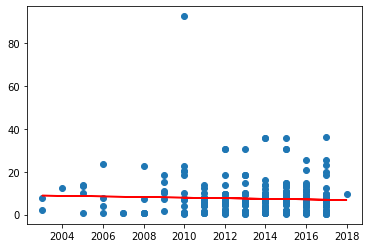

In [47]:
import pandas as pd  

Y = car_data.Present_Price
X=pd.DataFrame(car_data.Year)
 
       
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


#entrainement du modèle

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)
y_train_predict = lmodellineaire.predict(X_train)

plt.scatter(car_data.Year, car_data.Present_Price)
plt.plot(X_train,y_train_predict,'red')


plt.show()


● Amélioration du modèle en utilisant plusieurs variables d'entrée , telles que
Kms_Driven et Transmission 

### Exploration et étude de faisabilité (coefficient de correlation,transfromation des données)

<AxesSubplot:>

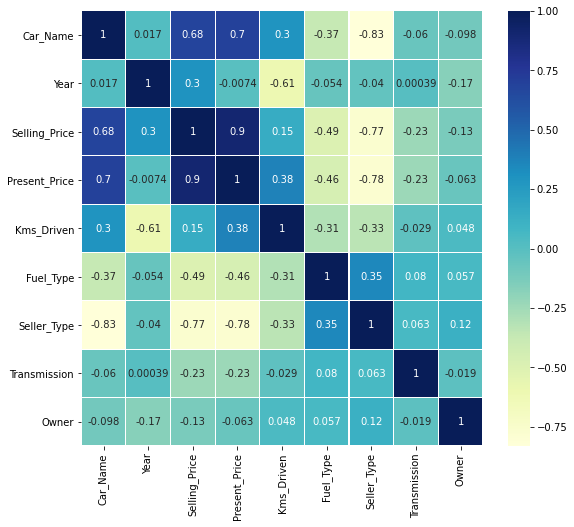

In [56]:
from sklearn.preprocessing import LabelEncoder
car_data_2=car_data.apply(LabelEncoder().fit_transform)
matrice_corr1=car_data_2.corr()
fig, axe = plt.subplots(figsize =(9, 8)) 
sns.heatmap(matrice_corr1, ax = axe, cmap ="YlGnBu", linewidths = 0.1,annot=True)

In [55]:
#Visualisastion des données
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
#affichage des nouveaux données apres transformation numérique
print(car_data_2.head())
#entete de chaque colonne
car_data_2.keys()

   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0        90    11             59             57          86          2   
1        93    10             78            104         135          1   
2        68    14            112            106          26          2   
3        96     8             52             49          18          2   
4        92    11             76             73         134          1   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0  


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Évaluation de teste et du training avec appuie de score

In [59]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 8.690681339055798
le score R2 est 0.0020966689357276858


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 8.347938248311573
le score R2 est -0.011856916957848185


## Étude régression multivarié

In [73]:

#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[car_data_2['Car_Name'],car_data['Year'],car_data['Kms_Driven'],
                     car_data_2['Fuel_Type'],car_data_2['Seller_Type'],car_data_2['Transmission'],car_data['Owner']], columns = ['Car_Name','Year','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
Y = car_data_2['Selling_Price']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)



(240, 7)
(61, 7)
(240,)
(61,)


LinearRegression()

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 21.927131577549712
le score R2 est 0.7339103748039242


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 22.454795930186936
le score R2 est 0.7488154775128765


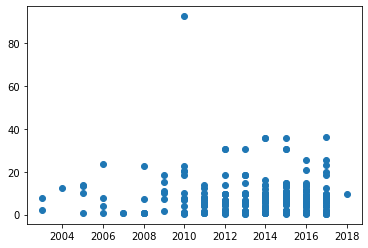

In [79]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

plt.scatter(car_data.Year, car_data.Present_Price)
#plt.plot(X_train,y_train_predict,'red')


plt.show()

In [ ]:
## évaluation d'erreur de prediction

In [80]:
mse = mean_squared_error(Y_test, y_test_predict)
print(mse,lmodellineaire.intercept_,lmodellineaire.coef_)

504.21786026633976 -10578.728281743695 [ 1.72479511e-01  5.31067254e+00  1.66528963e-04 -1.72963812e+01
 -5.06916165e+01 -1.95476124e+01  4.89099513e+00]


In [82]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Réduction des données car besoin que des voitures à transmission Manuelle et dont l'années est supérieur à 2012 avec un Kms_Driven < 100000

In [86]:
car_data_3=car_data[car_data.Year > 2012]
car_data_3=car_data_3[car_data_3.Kms_Driven < 100000]
car_data_3=car_data_3[car_data_3.Transmission == "Manual"]
car_data_3.drop("Transmission", axis=1)
car_data_3

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Visualisation des nouvelles données et nouvelle étude de régression libéaire avec la méthode seaborn

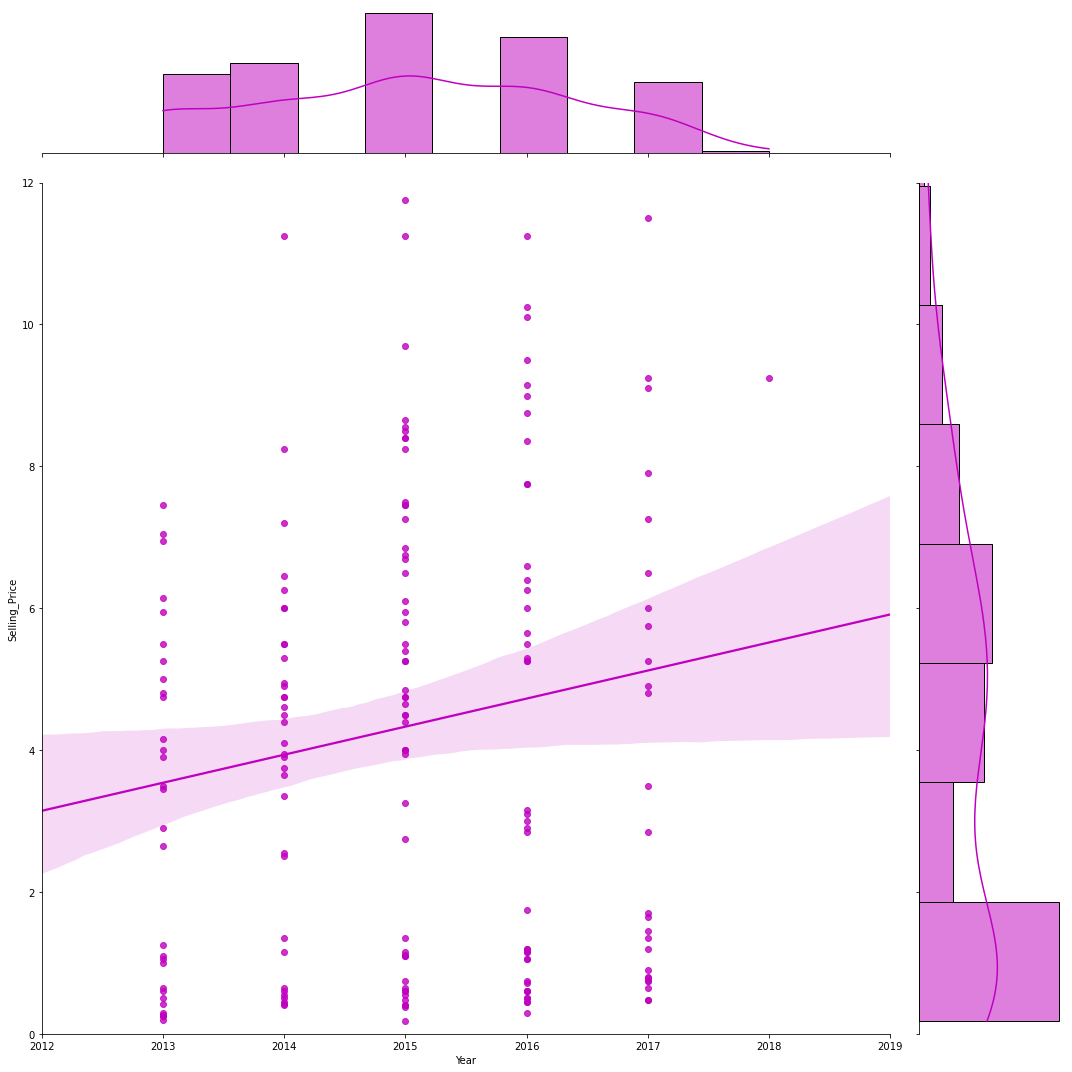

In [88]:

g = sns.jointplot(x="Year", y="Selling_Price", data=car_data_3,
                  kind="reg", truncate=False,
                  xlim=(2012, 2019), ylim=(0, 12),
                  color="m", height=15)

# visualisation des nouvelles données avec la méthode skleran

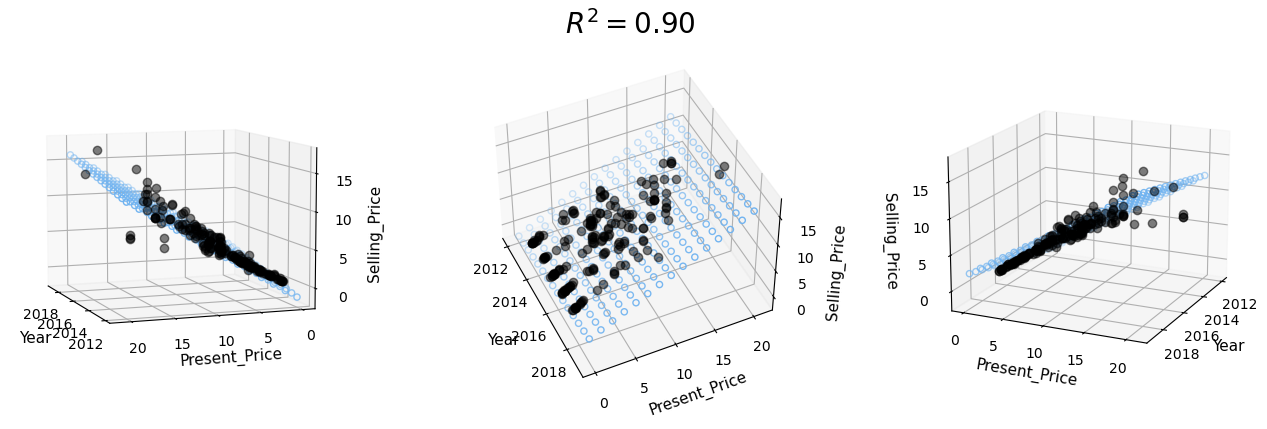

In [99]:
######################################## préparation de données #########################################
from sklearn import linear_model
X = car_data_3[['Year', 'Present_Price']].values
Y = car_data_3['Selling_Price']

######################## Prepare model data point for visualization ###############################
x = X[:, 0]
y = X[:, 1]
z = Y
x_pred = np.linspace(2012, 2019, 15)   # range of porosity values
y_pred = np.linspace(0, 20, 15)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

###################################### fitting et Training ########################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

###################################### Evaluation de score #########################################

r2 = model.score(X, Y)

###################################### afficahge des graphes #######################################


plt.style.use('default')

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Present_Price', fontsize=11)
    ax.set_zlabel('Selling_Price', fontsize=11)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
    
ax1.view_init(elev=8, azim=160)
ax2.view_init(elev=45, azim=-25)
ax3.view_init(elev=17, azim=25)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()



# Toute les voiture de cette nouvelle données sont des Manuelles à moins de 100000Km
# # Donc pour répondre à la question on peut juste donner la prédiction du prix selon l'année de la voiture

In [104]:
# function for prediction
def prediction(year, presentprice):
    predictedPrice = ols.predict([[year, presentprice]])
    return predictedPrice[0].round(2)

#Example pour une voiture de 2014 
print('pour une voiture de 2014' )
print(prediction(int(2014),int(12.1)))



pour une voiture de 2014
7.79


# Autre méthode d'estimation du prix de la voiture en focntion de l'année 

## cette méthode consiste à donner l'année de la voiture qu'on souhaite acheter et de donner son budget puis l'algo vous return le prix réel de voiture que vous souhaitez acheter


In [105]:
year=int(input('Saisissez l année de votre votre?(Year, ex: 2014) : '))
presentprice=float(input('Quel est le budget de votre sur cette voiture?(Present_Price, ex: 14.5) : '))
prediction(year, presentprice)

Saisissez l année de votre votre?(Year, ex: 2014) : 2015
Quel est le budget de votre sur cette voiture?(Present_Price, ex: 14.5) : 13.2


9.12